In [80]:
from lib.utilities import *
import matplotlib.pyplot as plt

is_launched = False
should_launch = False

In [81]:
if not is_launched and should_launch:
    Automation().launch_all()  # opens TurboSM, PhotoZ, Pulser, and some helpful file explorers
    is_launched = True

In [82]:
# automation, can be overridden in next cell
assign_ascending_recording_numbers = True
slice_no = 4
location_no = 1
recording_no = 1
n_group_by_trials = 5 # Treats every n selected files as trials to combine into single ZDA file
filename_PhotoZ_format = True # whether to write slice_loc_rec.zda as filename. Else reuse *.tsm -> *.zda
apply_preprocess = False  # apply data inversing and polyfit baseline correction to save time in PhotoZ

filename_base = "00-00-00"
filename_start_no = 76
filename_end_no = 105
camera_program = 4

In [83]:
file_type = '.tsm'
datadir = "./tsm_targets/06-06-22" # All files in this directory + subdirectories are loaded
datadir = "C:/Turbo-SM/SMDATA/John/06-06-22" # on new rig
selected_filenames = ["Untitled014", "Untitled015", "Untitled016", "Untitled017", "Untitled018",
                     "Untitled019", "Untitled020", "Untitled021", "Untitled022", "Untitled023"]
selected_filenames = [] 
for i in range(filename_start_no, filename_end_no+1):
    nm = str(i)
    while len(nm) < 3:
        nm = "0" + nm
    selected_filenames.append(filename_base + nm)
print(selected_filenames)

['00-00-00076', '00-00-00077', '00-00-00078', '00-00-00079', '00-00-00080', '00-00-00081', '00-00-00082', '00-00-00083', '00-00-00084', '00-00-00085', '00-00-00086', '00-00-00087', '00-00-00088', '00-00-00089', '00-00-00090', '00-00-00091', '00-00-00092', '00-00-00093', '00-00-00094', '00-00-00095', '00-00-00096', '00-00-00097', '00-00-00098', '00-00-00099', '00-00-00100', '00-00-00101', '00-00-00102', '00-00-00103', '00-00-00104', '00-00-00105']


In [84]:
cam_settings = CameraSettings().get_program_settings(camera_program)
print(cam_settings)

t_cropping = [0, -1]  # to handle artifacts
binning = int(cam_settings['height'] / 80)  # recommended binning, adjust as desired

{'interval_between_samples': 0.5, 'width': 512, 'height': 160, 'camera_program': 4, 'cropping': [176, 336]}


In [85]:
# Load data
data_loader = DataLoader()
if file_type == '.tsm':
    selected_filename = None  # set to a filename if there's only one you want to load, to avoid processing everything
    data_loader.load_all_tsm(data_dir=datadir, file_only=selected_filename)
    
print(data_loader.get_n_files_loaded(), "files loaded.")

00-00-00076.tbn
00-00-00076.tsm
C:/Turbo-SM/SMDATA/John/06-06-22/00-00-00076.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00077.tbn
00-00-00077.tsm
C:/Turbo-SM/SMDATA/John/06-06-22/00-00-00077.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00078.tbn
00-00-00078.tsm
C:/Turbo-SM/SMDATA/John/06-06-22/00-00-00078.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 

Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00001.tbn
00-00-00001.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\00-00/00-00-00001.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00002.tbn
00-00-00002.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\00-00/00-00-00002.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00003.tbn
00-00-0

C:/Turbo-SM/SMDATA/John/06-06-22\01-00/00-00-00029.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00030.tbn
00-00-00030.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\01-00/00-00-00030.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00031.tbn
00-00-00031.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\01-00/00-00-00031.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_heig

TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00053.tbn
00-00-00053.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\02-00/00-00-00053.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00054.tbn
00-00-00054.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\02-00/00-00-00054.tsm to be treated as TSM file to open
Reading file as 200 images of size 512 x 160
TBN file designates origin as NI for this data.
Found 4 channels in BNC ratio: 1
{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
00-00-00055.tbn
00-00-00055.tsm
C:/Turbo-SM/SMDATA/John/06-06-22\02-

{'points_per_trace': 200, 'raw_width': 512, 'raw_height': 160, 'interval_between_samples': 0.5, 'number_of_trials': 1}
100 files loaded.


In [86]:
# Select data of interest        
selected_datasets = [data_loader.select_data_by_keyword(fn) for fn in selected_filenames]

for i in range(len(selected_filenames) - 1, 0):
    if selected_datasets[i] is None:
        del selected_datasets[i]
        del selected_filenames[i]

print("# datasets to analyze:", len(selected_datasets))
if len(selected_datasets) % n_group_by_trials != 0:
    print("Cannot group", len(selected_datasets), "trials into groups of", str(n_group_by_trials) + ".")
    n_discard = int(len(selected_datasets) % n_group_by_trials)
    print("Discarding last", n_discard, "files.")
    del selected_datasets[-n_discard:]
    del selected_filenames[-n_discard:]
    print("New # datasets to analyze:", len(selected_datasets))

# binning and cropping
for i in range(len(selected_datasets)):
    sd = selected_datasets[i]
    if sd is None:
        print("Dataset not found:", selected_filenames[i])
    sd.clip_data(y_range=cam_settings['cropping'], t_range=t_cropping)
    sd.bin_data(binning=binning)

# load data
datasets = [{'filename': selected_filenames[i],
             'raw_data': selected_datasets[i].get_data(),
             'meta': selected_datasets[i].get_meta(),
             'rli': selected_datasets[i].get_rli(),
             'fp_data': selected_datasets[i].get_fp_data()}
             for i in range(len(selected_datasets))]

# datasets to analyze: 30
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points_per_trace': 199, 'raw_width': 199, 'raw_height': -40, 'interval_between_samples': 0.5, 'number_of_trials': 1} (1, 199, 159, 160)
{'points

(1, 199, 80, 80)


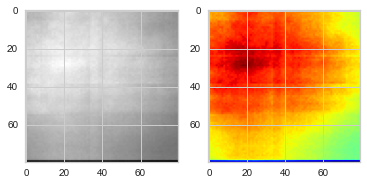

(1, 199, 80, 80)


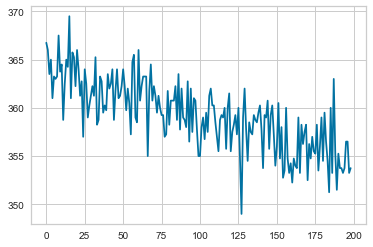

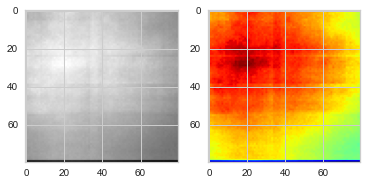

(1, 199, 80, 80)


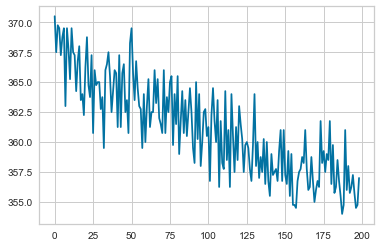

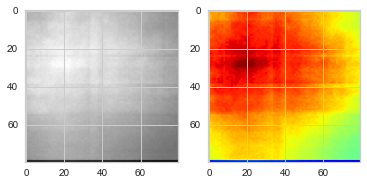

(1, 199, 80, 80)


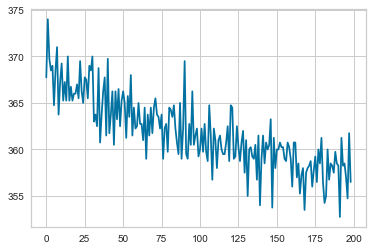

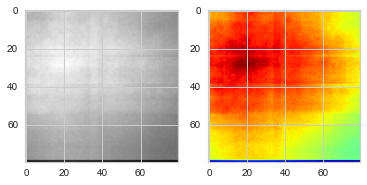

(1, 199, 80, 80)


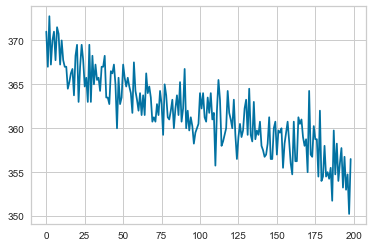

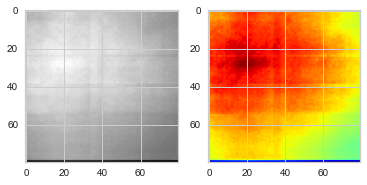

(1, 199, 80, 80)


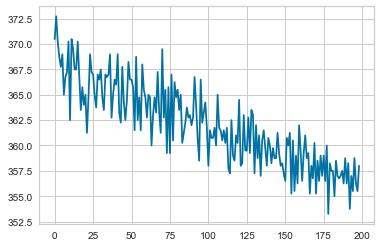

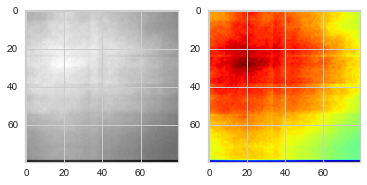

(1, 199, 80, 80)


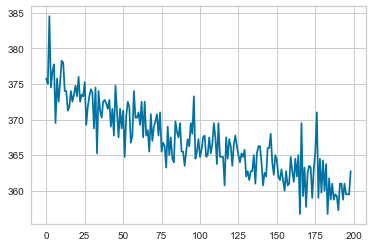

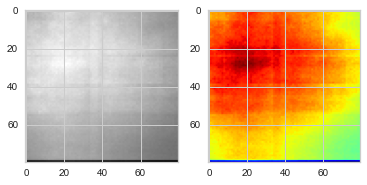

(1, 199, 80, 80)


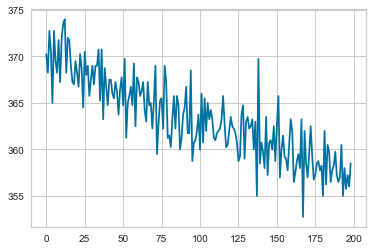

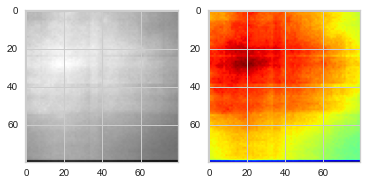

(1, 199, 80, 80)


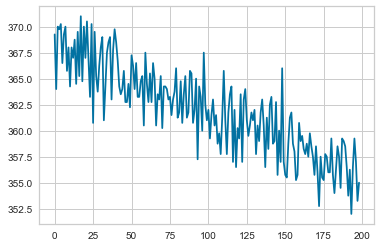

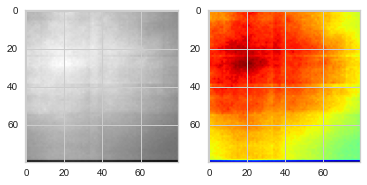

(1, 199, 80, 80)


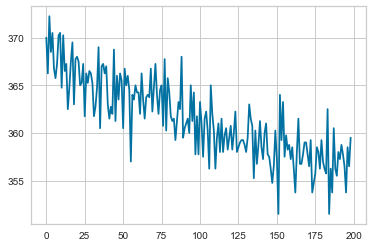

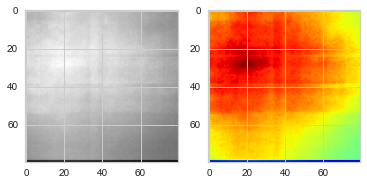

(1, 199, 80, 80)


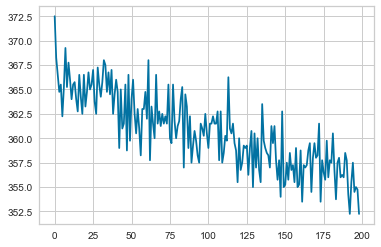

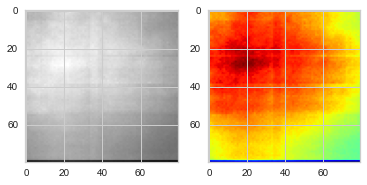

(1, 199, 80, 80)


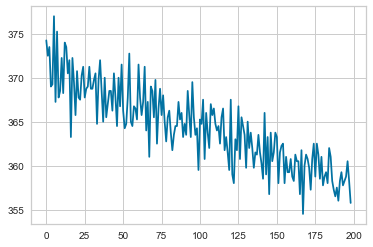

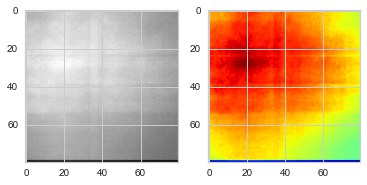

(1, 199, 80, 80)


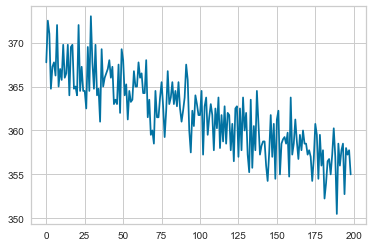

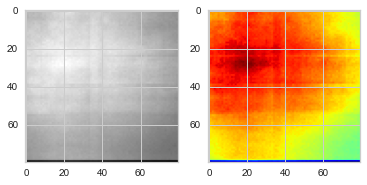

(1, 199, 80, 80)


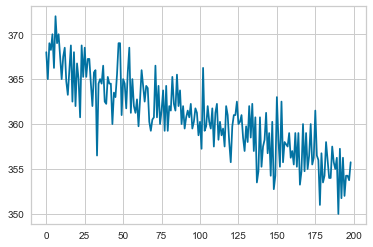

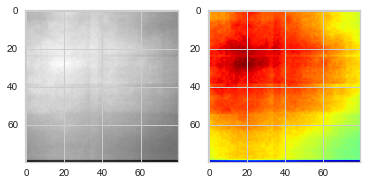

(1, 199, 80, 80)


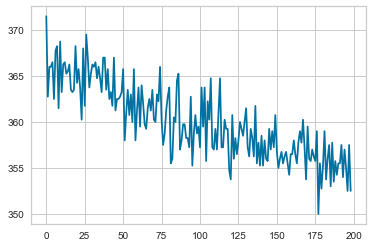

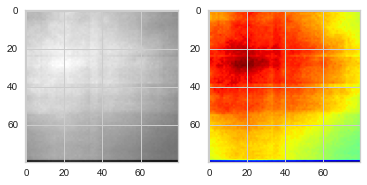

(1, 199, 80, 80)


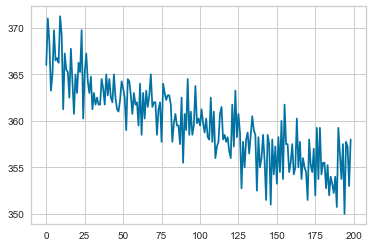

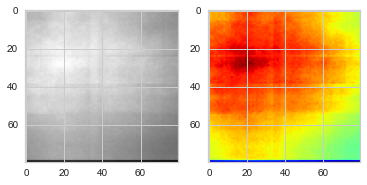

(1, 199, 80, 80)


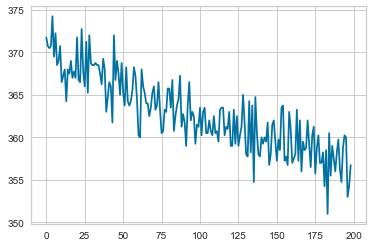

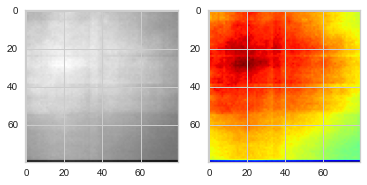

(1, 199, 80, 80)


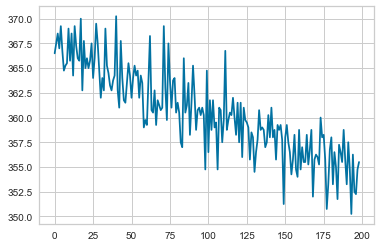

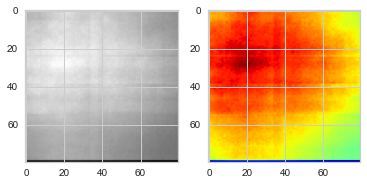

(1, 199, 80, 80)


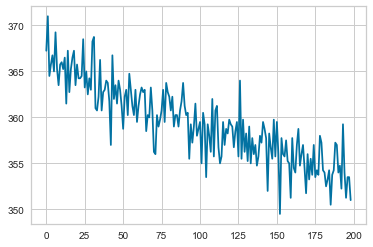

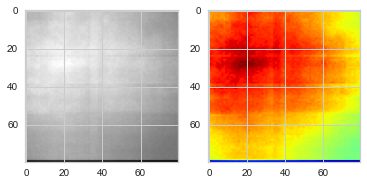

(1, 199, 80, 80)


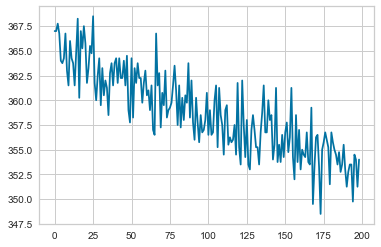

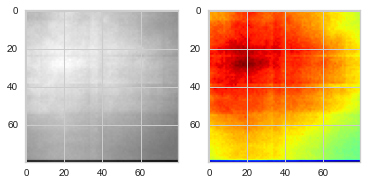

(1, 199, 80, 80)


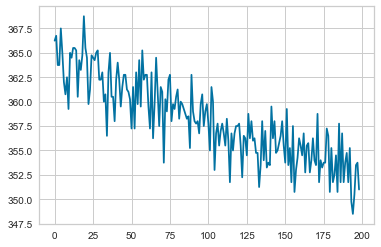

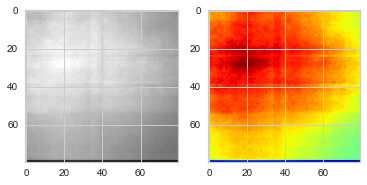

(1, 199, 80, 80)


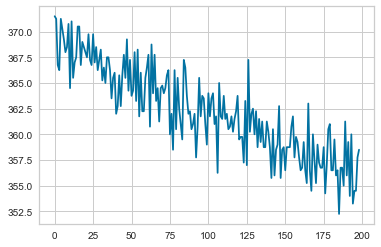

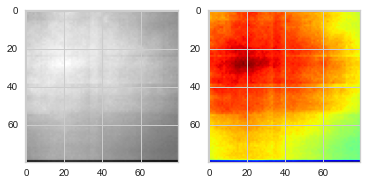

(1, 199, 80, 80)


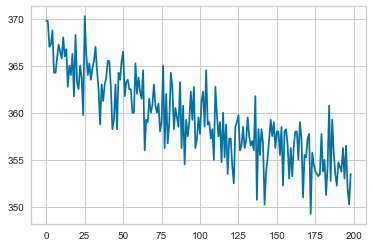

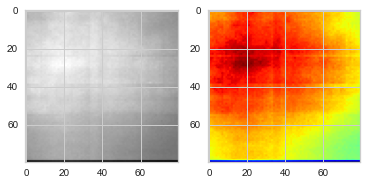

(1, 199, 80, 80)


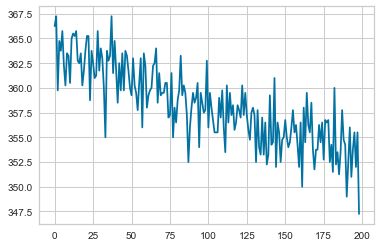

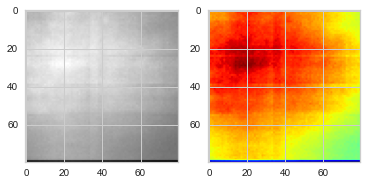

(1, 199, 80, 80)


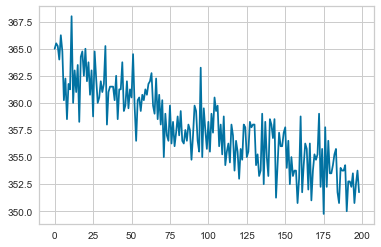

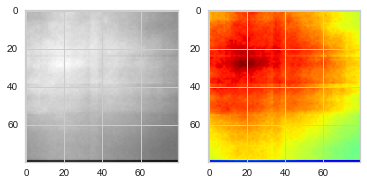

(1, 199, 80, 80)


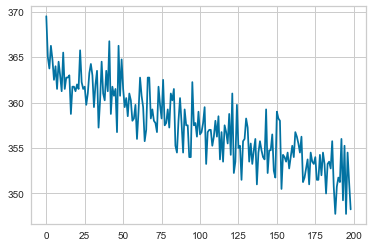

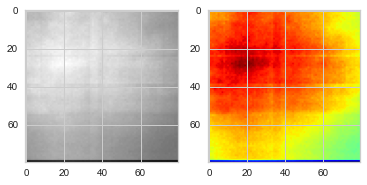

(1, 199, 80, 80)


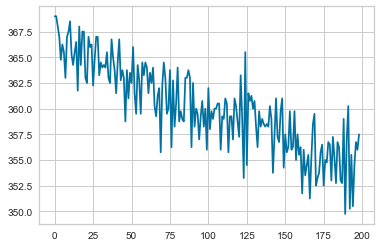

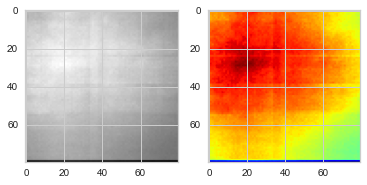

(1, 199, 80, 80)


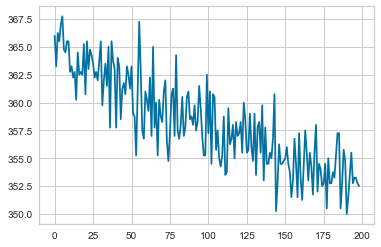

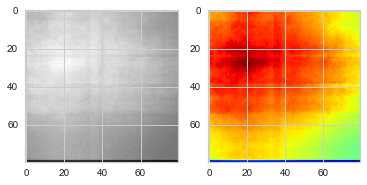

(1, 199, 80, 80)


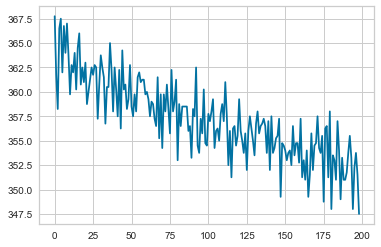

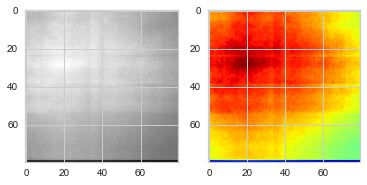

(1, 199, 80, 80)


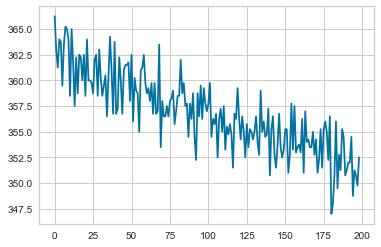

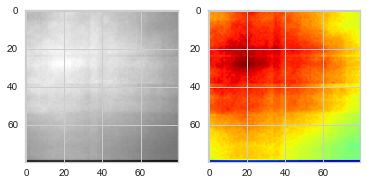

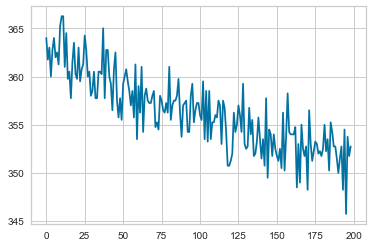

In [87]:
# if we're just one off, auto-correct for the user
for data in datasets:
    if data['raw_data'].shape[2] - data['raw_data'].shape[3] == 1:
        data['raw_data'] = raw_data[:, :, :-1, :]
    elif data['raw_data'].shape[3] - data['raw_data'].shape[2] == 1:
        data['raw_data'] = data['raw_data'][:, :, :, :-1]
    print(data['raw_data'].shape)

    # view frames
    fig, axes = plt.subplots(1, 2)
    axes[0].imshow(data['raw_data'][0,0,:,:],cmap='gray')
    axes[1].imshow(data['raw_data'][0,-1,:,:],cmap='jet')
    plt.show()

    data['rli_high_cp'] = np.copy(data['raw_data'][0,0,:,:]).astype(np.uint16)
    plt.subplots()
    plt.plot(data['raw_data'][0,:,0,0])

    # final check 
    if data['raw_data'].shape[2] != data['raw_data'].shape[3]:
        raise Exception("PhotoZ will not work with non-square array! Adjust cropping and/or binning")

In [88]:
# Fill in missing metadata as needed
trial_ct = 0
for data in datasets:
    meta = data['meta']
    raw_data = data['raw_data']
    rli = data['rli']
    
    data['meta']['version'] = 5
    data['meta']['slice_number'] = slice_no
    data['meta']['location_number'] = location_no
    data['meta']['record_number'] = recording_no
    if assign_ascending_recording_numbers:
        if trial_ct % n_group_by_trials == 0:
            recording_no += 1
        trial_ct += 1
    data['meta']['camera_program'] = cam_settings['camera_program']

    data['meta']['interval_between_trials'] = 2
    data['meta']['acquisition_gain'] = 1
    data['meta']['time_RecControl'] = 5

    data['meta']['reset_onset'] = 1
    data['meta']['reset_duration'] = 5
    data['meta']['shutter_onset'] = 5
    data['meta']['shutter_duration'] = 5

    data['meta']['stimulation1_onset'] = 20
    data['meta']['stimulation1_duration'] = 1
    data['meta']['stimulation2_onset'] = 0
    data['meta']['stimulation2_duration'] = 0

    data['meta']['acquisition_onset'] = 1
    data['meta']['interval_between_samples'] = cam_settings['interval_between_samples']

    data['meta']['raw_width'] = raw_data.shape[2]
    data['meta']['raw_height'] = raw_data.shape[3]
    data['meta']['points_per_trace'] = raw_data.shape[1]
    data['meta']['number_of_trials'] = raw_data.shape[0]
    data['meta']['num_fp_pts'] = 8
    num_diodes = int(meta['raw_width'] * meta['raw_height'] + meta['num_fp_pts'])
    data['rli'] = {}
    data['rli']['rli_low'] = np.zeros((1, num_diodes), 
                                      dtype = np.uint16)
    data['rli']['rli_high'] = np.zeros((1, num_diodes), 
                                       dtype = np.uint16) 
    data['rli']['rli_high'][0, :meta['raw_width'] * meta['raw_height']] = data['rli_high_cp'].reshape(-1)
    data['rli']['rli_max'] = np.ones((1, num_diodes), 
                                     dtype = np.uint16)


In [89]:
# Run this cell at most once
for data in datasets:
    if apply_preprocess:
        # Apply baseline correction here. Because PhotoZ chokes on baseline correcting TurboSM data
        tr = Tracer()
        #data inversing
        data['raw_data'] = -data['raw_data']

        # Need to subtract off the low-frequency voltage drift. First-order correction
        tr.correct_background(data['meta'], data['raw_data'])


(1, 199, 80, 80)


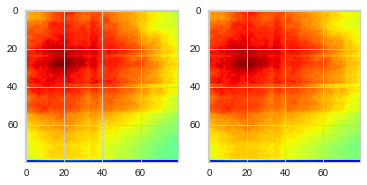

(1, 199, 80, 80)


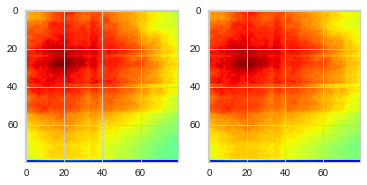

(1, 199, 80, 80)


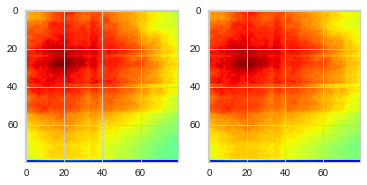

(1, 199, 80, 80)


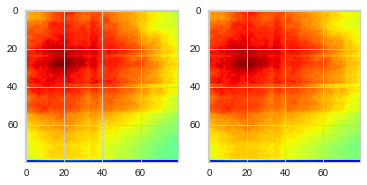

(1, 199, 80, 80)


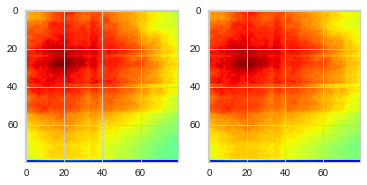

(1, 199, 80, 80)


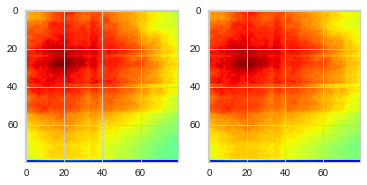

(1, 199, 80, 80)


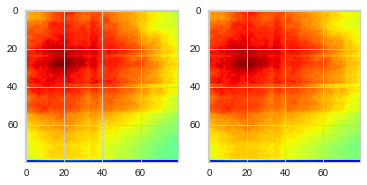

(1, 199, 80, 80)


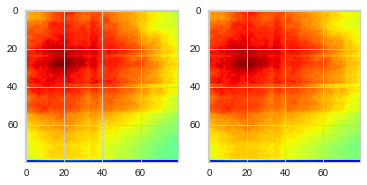

(1, 199, 80, 80)


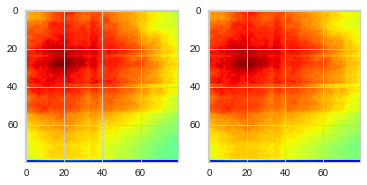

(1, 199, 80, 80)


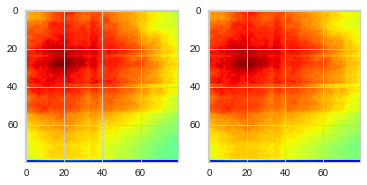

(1, 199, 80, 80)


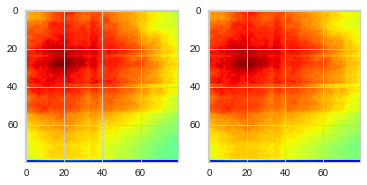

(1, 199, 80, 80)


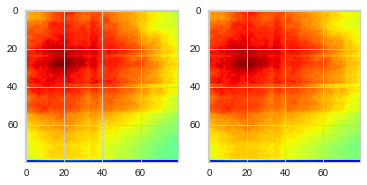

(1, 199, 80, 80)


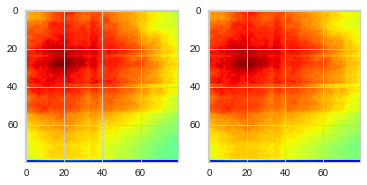

(1, 199, 80, 80)


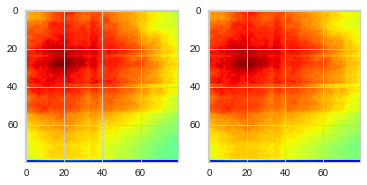

(1, 199, 80, 80)


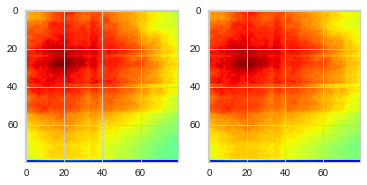

(1, 199, 80, 80)


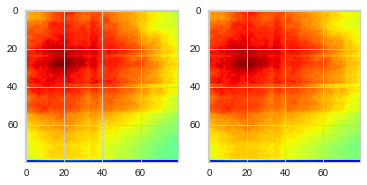

(1, 199, 80, 80)


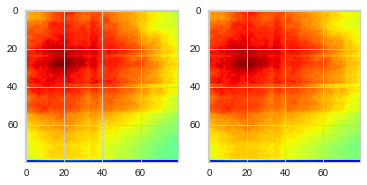

(1, 199, 80, 80)


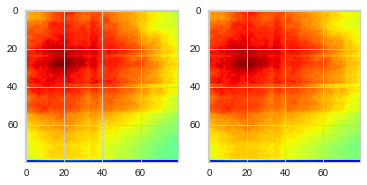

(1, 199, 80, 80)


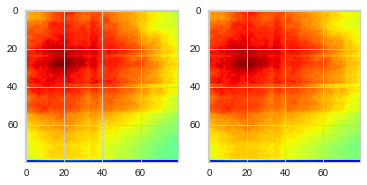

(1, 199, 80, 80)


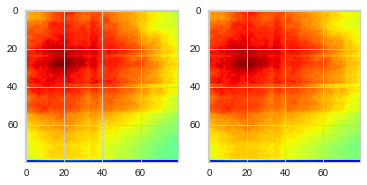

(1, 199, 80, 80)


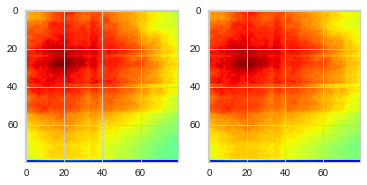

(1, 199, 80, 80)


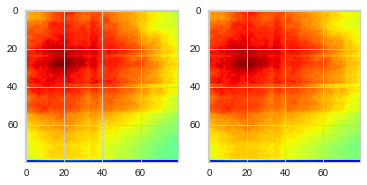

(1, 199, 80, 80)


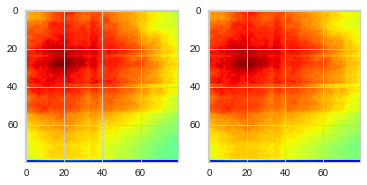

(1, 199, 80, 80)


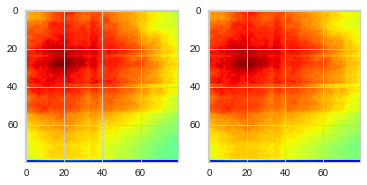

(1, 199, 80, 80)


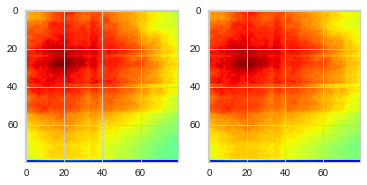

(1, 199, 80, 80)


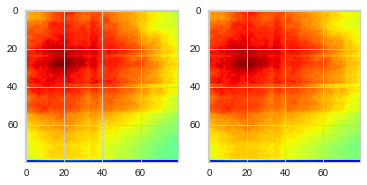

(1, 199, 80, 80)


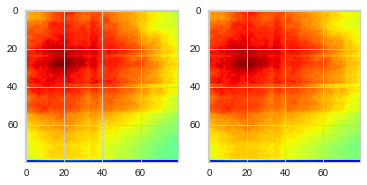

(1, 199, 80, 80)


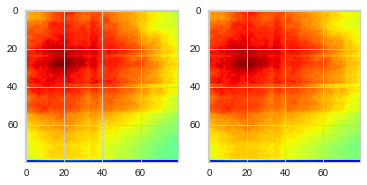

(1, 199, 80, 80)


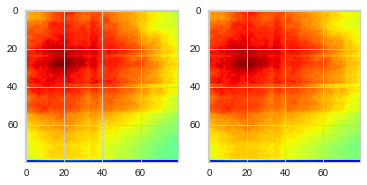

(1, 199, 80, 80)


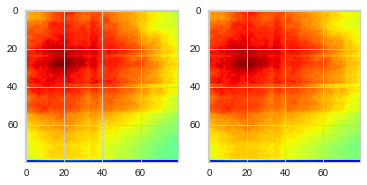

In [90]:
for data in datasets:

    # normalize raw data to 12-bit range
    data['fp_data'] = normalize_bit_range(data['fp_data'])
    data['raw_data'] = normalize_bit_range(data['raw_data'])

    # view frames
    fig, axes = plt.subplots(1, 2)
    print(data['raw_data'].shape)
    axes[0].imshow(raw_data[0,0,:,:],cmap='jet')
    axes[1].imshow(raw_data[0,-1,:,:],cmap='jet')
    plt.show()


(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)
(1, 8, 199)

<ipython-input-91-895ea490d96a>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()



(1, 8, 199)


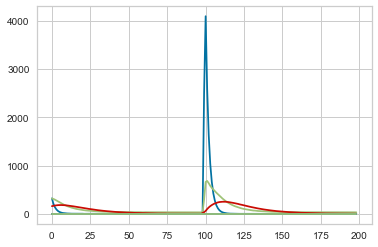

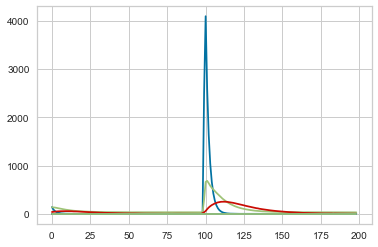

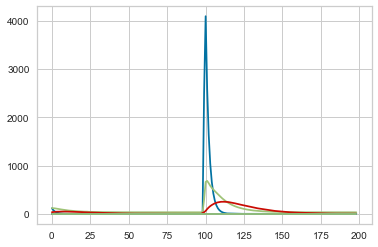

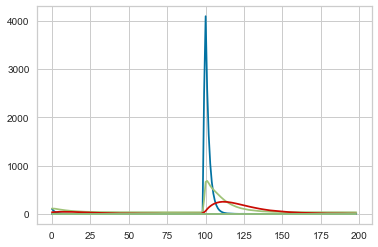

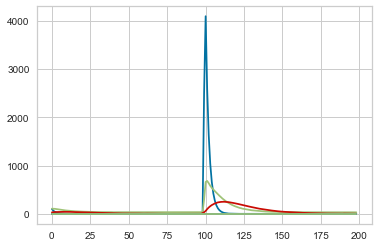

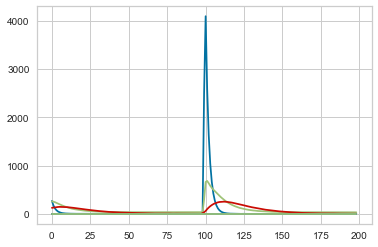

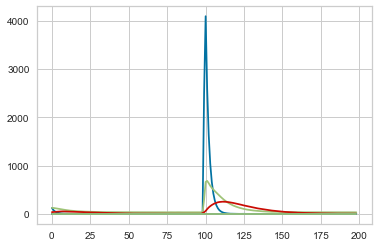

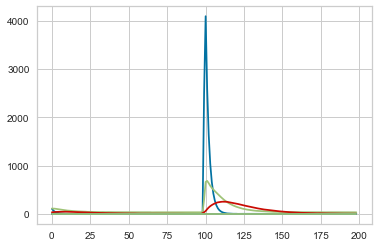

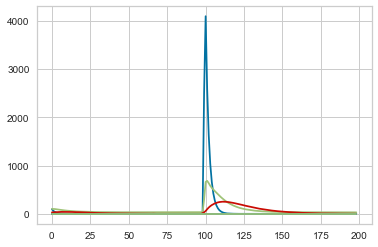

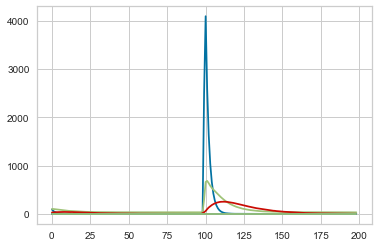

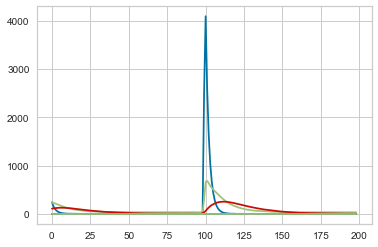

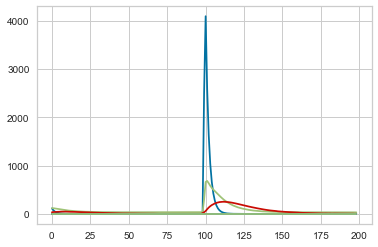

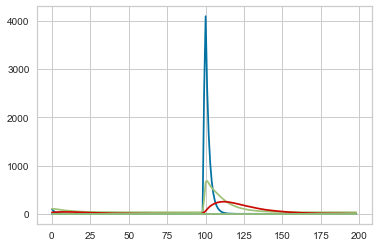

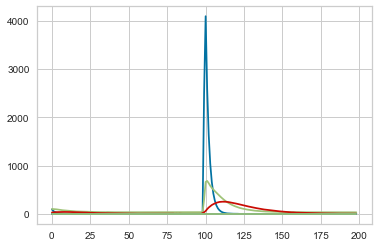

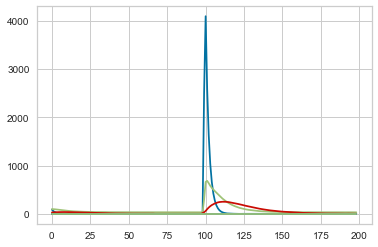

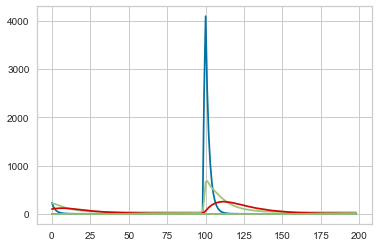

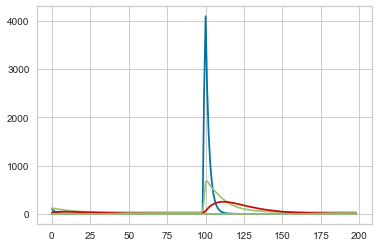

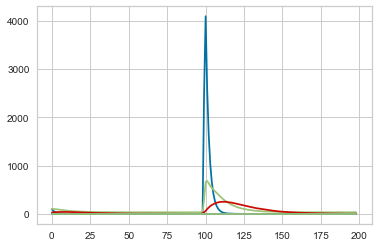

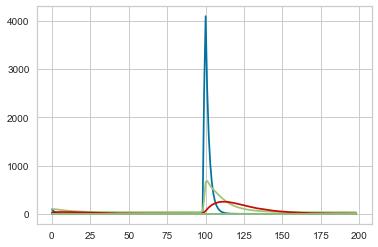

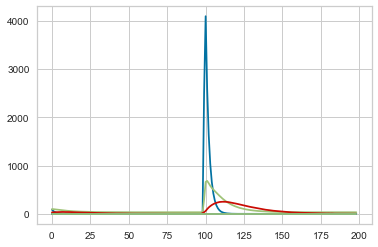

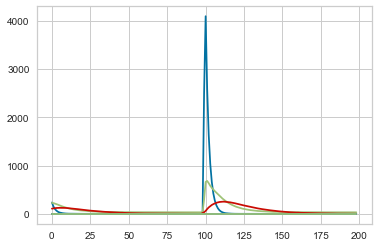

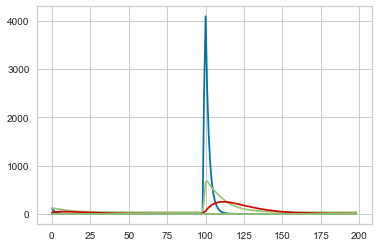

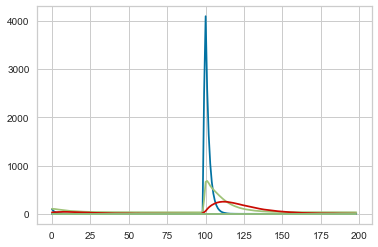

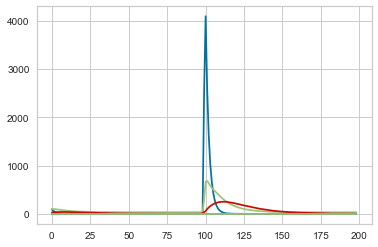

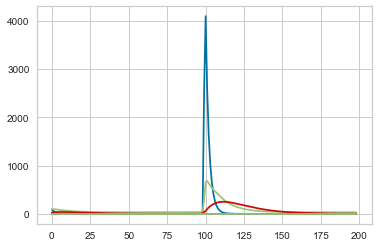

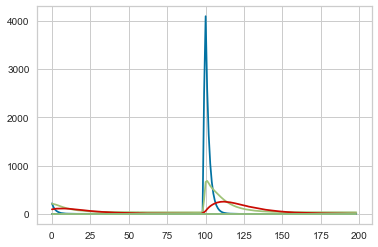

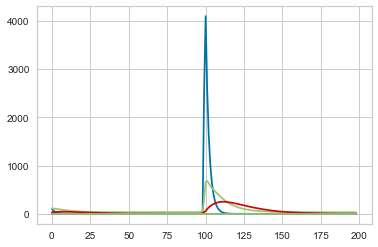

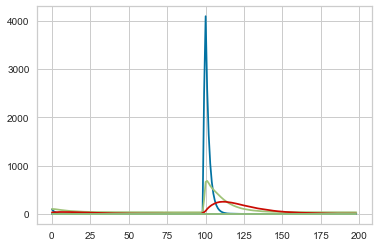

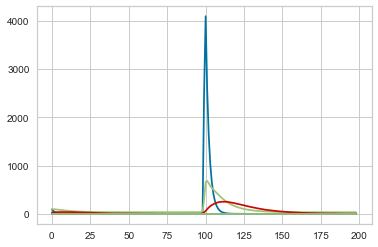

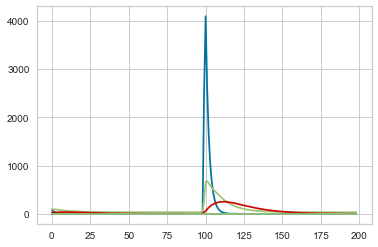

In [91]:
# resize FP data
for data in datasets:
    meta = data['meta']
    fp_data = data['fp_data']
    
    fp_data_final = np.zeros((1, fp_data.shape[0], meta['num_fp_pts']))
    fp_data_final[0, :, :fp_data.shape[1]] = fp_data[:, :]
    data['fp_data'] = np.swapaxes(fp_data_final, 2, 1)[:, :, t_cropping[0]:t_cropping[1]]
    print(data['fp_data'].shape)

    fig, ax = plt.subplots()
    ax.plot(fp_data_final[0, t_cropping[0]:t_cropping[1], :])

In [92]:
# group data by trials


def concatenate_trials(trial_data):
    trial_data['raw_data'] = np.concatenate(trial_data['raw_data'], 
                                                        axis=0)
    if trial_data['raw_data'].shape[0] != n_group_by_trials:
        raise TypeError("Trial axis is wrong shape:", 
                        trial_data['raw_data'].shape)
    trial_data['fp_data'] = np.concatenate(trial_data['fp_data'], 
                                           axis=0)
    if trial_data['fp_data'].shape[0] != n_group_by_trials:
        raise TypeError("Trial axis is wrong shape:", 
                        trial_data['fp_data'].shape)

trial_datasets = []
trial_data = None
if n_group_by_trials > 1:
    trial_ct = 0
    for data in datasets:
        if trial_ct % n_group_by_trials == 0:
            if trial_data is not None:
                concatenate_trials(trial_data)
                trial_datasets.append(trial_data)
            # next dataset
            trial_data = {
                'raw_data': [],
                'meta': data['meta'],
                'fp_data': [],
                'rli': data['rli']  # only uses RLI of first file
            }
            trial_data['meta']['number_of_trials'] = n_group_by_trials
            print("trial group", len(trial_datasets))
        # collect raw_data, fp_data, and rli
        i_trial = trial_ct % n_group_by_trials
        trial_data['raw_data'].append(data['raw_data'])
        trial_data['fp_data'].append(data['fp_data'])
        trial_ct += 1
        print("\t", data['filename'])
    # final set
    if trial_data is not None:
        concatenate_trials(trial_data)
        trial_datasets.append(trial_data)
    datasets = trial_datasets
    print("# of trial-grouped datasets:", len(datasets))

trial group 0
	 00-00-00076
	 00-00-00077
	 00-00-00078
	 00-00-00079
	 00-00-00080
trial group 1
	 00-00-00081
	 00-00-00082
	 00-00-00083
	 00-00-00084
	 00-00-00085
trial group 2
	 00-00-00086
	 00-00-00087
	 00-00-00088
	 00-00-00089
	 00-00-00090
trial group 3
	 00-00-00091
	 00-00-00092
	 00-00-00093
	 00-00-00094
	 00-00-00095
trial group 4
	 00-00-00096
	 00-00-00097
	 00-00-00098
	 00-00-00099
	 00-00-00100
trial group 5
	 00-00-00101
	 00-00-00102
	 00-00-00103
	 00-00-00104
	 00-00-00105
# of trial-grouped datasets: 6


In [93]:
# Write data
for data in datasets:
    meta = data['meta']
    raw_data = data['raw_data']
    rli = data['rli']
    fp_data = data['fp_data']
    if filename_PhotoZ_format:
        slic = str(meta['slice_number'])
        if len(slic) < 2:
            slic = "0" + slic
        loc = str(meta['location_number'])
        if len(loc) < 2:
            loc = "0" + loc
        rec = str(meta['record_number'])
        if len(rec) < 2:
            rec = "0" + rec
        data['filename'] = slic + "_" + loc + "_" + rec
    
    zda_writer = ZDA_Writer()
    zda_writer.write_zda_to_file(raw_data, meta, data['filename'] + ".zda", rli, fp_data)
    print("Written to " + data['filename'] + ".zda")

Not all DLL search paths added.
(5, 8, 199)
Written to 04_01_01.zda
Not all DLL search paths added.
(5, 8, 199)
Written to 04_01_02.zda
Not all DLL search paths added.
(5, 8, 199)
Written to 04_01_03.zda
Not all DLL search paths added.
(5, 8, 199)
Written to 04_01_04.zda
Not all DLL search paths added.
(5, 8, 199)
Written to 04_01_05.zda
Not all DLL search paths added.
(5, 8, 199)
Written to 04_01_06.zda


# 